In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os 

# Data exploration and Visualization

In [2]:
DATA_PATH = 'transactions.csv'
df = pd.read_csv(DATA_PATH)

In [3]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2318836,188,CASH_IN,39989.86,C1956056106,420.00,40409.86,C1627379834,167340.59,127350.74,0,0
577814,33,CASH_IN,161950.88,C643403362,25430.00,187380.88,C1992932799,3670711.47,3508760.59,0,0
5418834,378,CASH_OUT,168651.93,C1560824568,0.00,0.00,C1314348893,259027.02,427678.95,0,0
1817068,163,TRANSFER,892099.82,C735045059,9115.00,0.00,C1459496216,73958.39,966058.21,0,0
1484161,141,CASH_IN,12997.79,C1494254287,54258.00,67255.79,C1078243413,0.00,0.00,0,0
2358165,190,CASH_OUT,44504.10,C1337443955,0.00,0.00,C1962475063,1959553.55,2004057.65,0,0
1868128,164,PAYMENT,4557.25,C1617197023,0.00,0.00,M1641433507,0.00,0.00,0,0
2836292,226,PAYMENT,20213.49,C1222675743,116689.27,96475.78,M906639168,0.00,0.00,0,0
4546383,326,CASH_IN,474398.93,C340808666,4396.00,478794.93,C886107997,0.00,0.00,0,0
969132,44,PAYMENT,980.79,C343638600,0.00,0.00,M382732772,0.00,0.00,0,0


There are 11 columns. Column 'isFraud' is our target column. Let us check data types of each column.

In [29]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
hour                int64
dtype: object

There are three columns with data type 'object'.

In [30]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
hour              0
dtype: int64

No null values found! A clean dataset.

In [31]:
df.size

76351440

Almost 70M rows! A big dataset!

In [33]:
perFraud = (df[df['isFraud']==1].size/df.size)*100
print(perFraud)

0.12908204481801522


Only 0.13% of transactions are fraudulant. It is a highly imbalanced dataset. Hence, we have to be careful in reporting our results and accuracy might not be a good parameter to report for this classification problem. We will look at precision and recall.

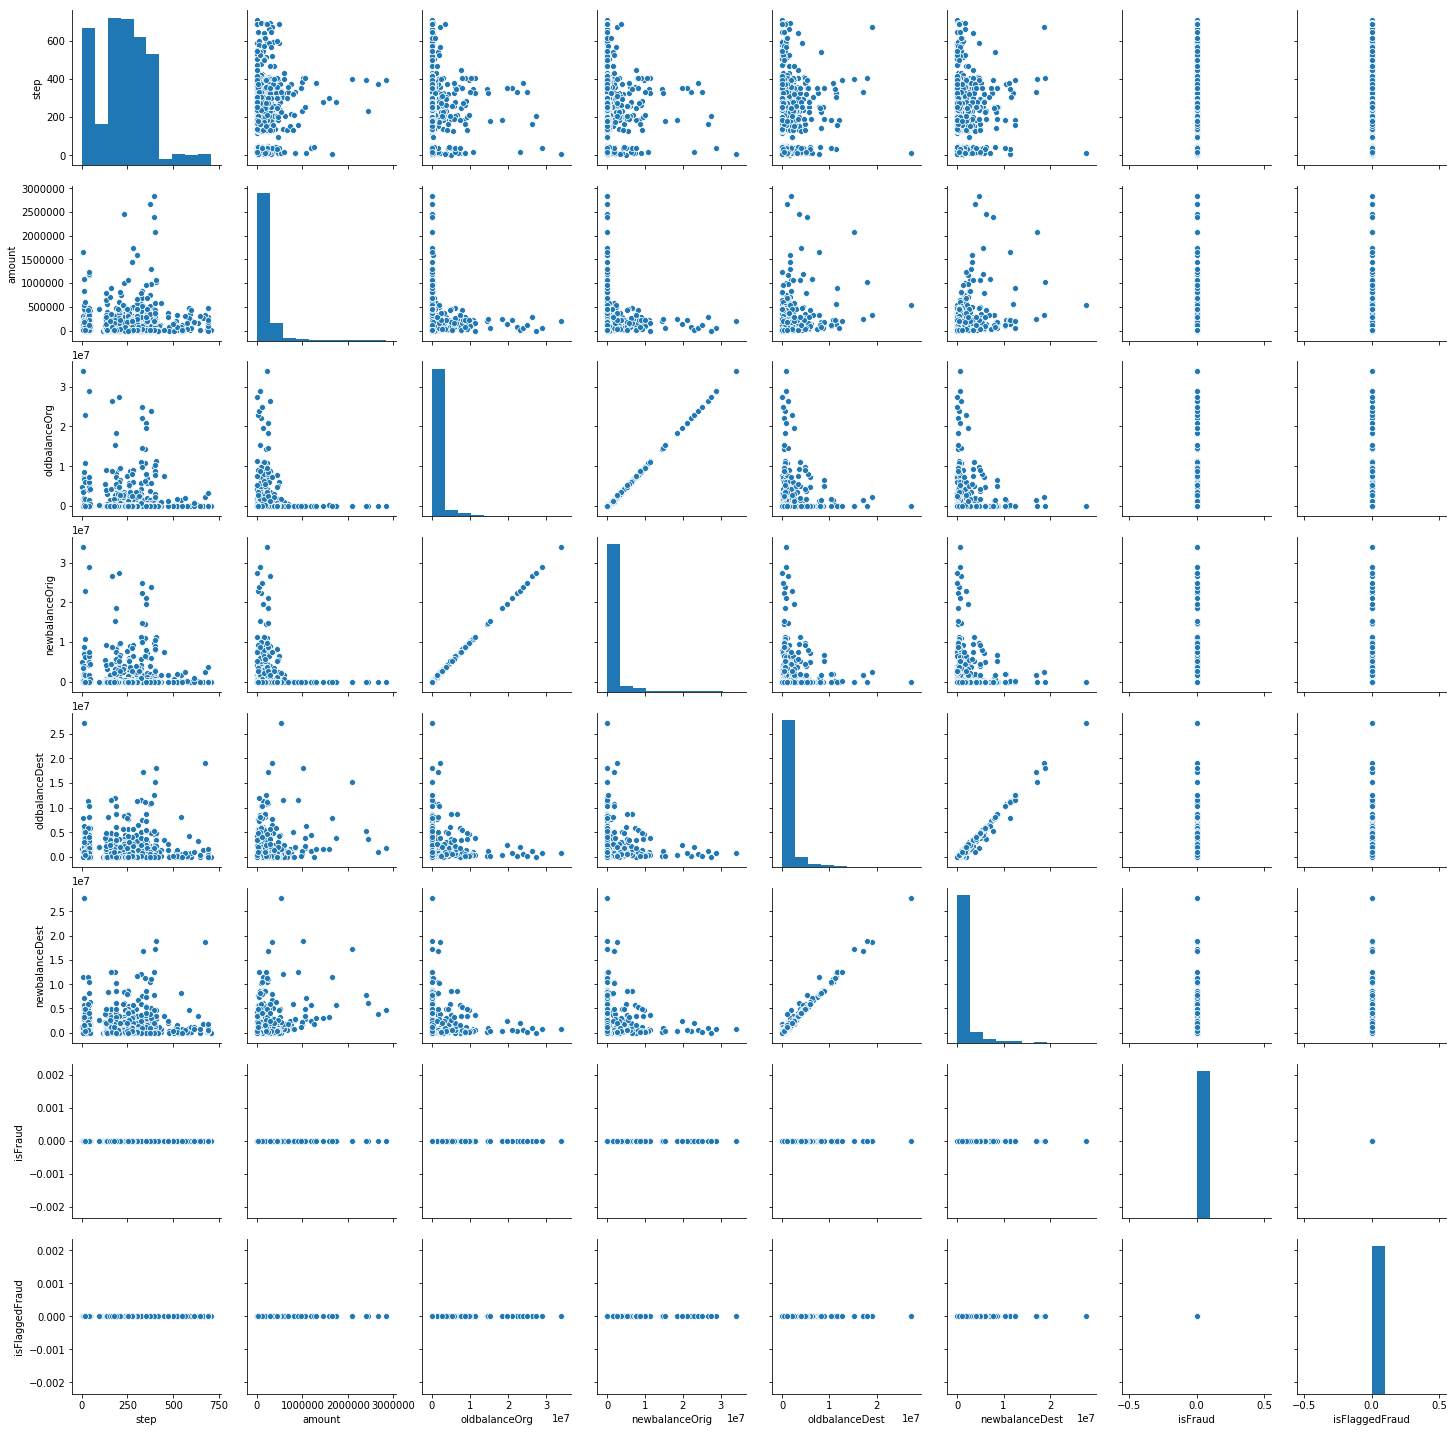

In [4]:
sns.pairplot(df.sample(10**3));

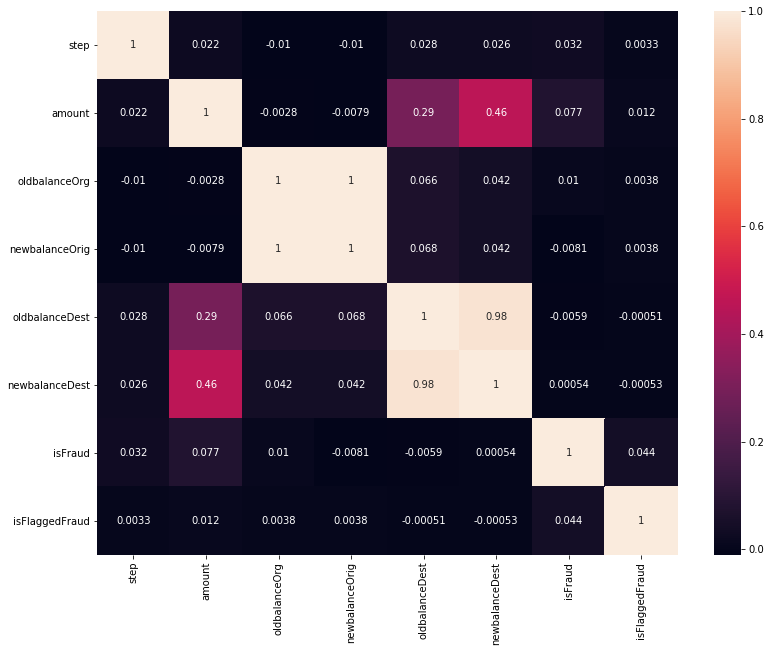

In [5]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True);

In [6]:
pd.crosstab(df['isFraud'], df['isFlaggedFraud'])

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [7]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [8]:
df.sample().to_dict()

{'step': {1624057: 157},
 'type': {1624057: 'CASH_OUT'},
 'amount': {1624057: 443298.2},
 'nameOrig': {1624057: 'C443955073'},
 'oldbalanceOrg': {1624057: 7312.72},
 'newbalanceOrig': {1624057: 0.0},
 'nameDest': {1624057: 'C1266821802'},
 'oldbalanceDest': {1624057: 1273781.74},
 'newbalanceDest': {1624057: 1717079.94},
 'isFraud': {1624057: 0},
 'isFlaggedFraud': {1624057: 0}}

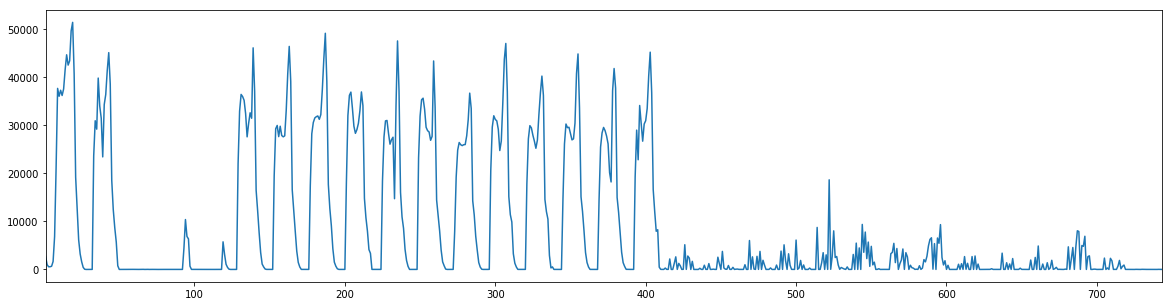

In [9]:
plt.figure(figsize=(20, 5))
df['step'].value_counts().sort_index().plot();
# plt.xlim(150, 450);

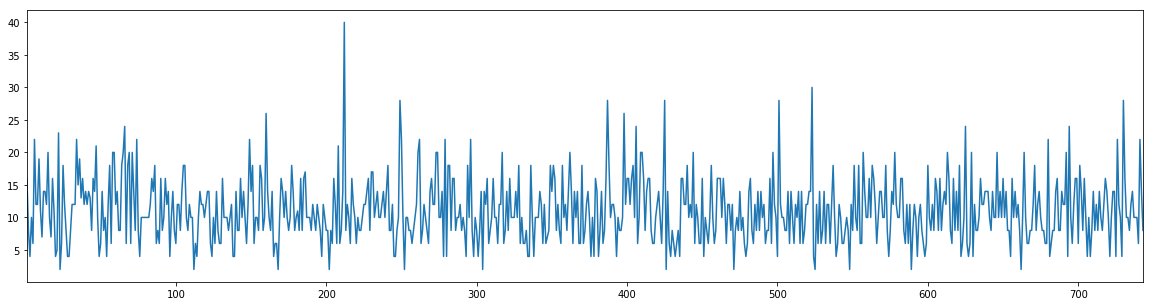

In [10]:
plt.figure(figsize=(20, 5))
df[df['isFraud']==1]['step'].value_counts().sort_index().plot();
# plt.xlim(150, 450);

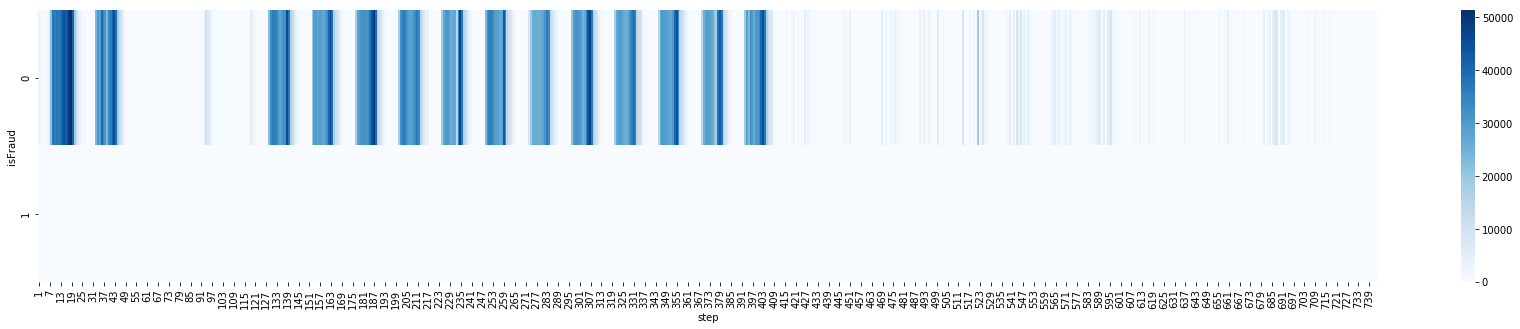

In [11]:
plt.figure(figsize=(30, 5))
sns.heatmap(pd.crosstab(df['isFraud'], df['step']), cmap='Blues');

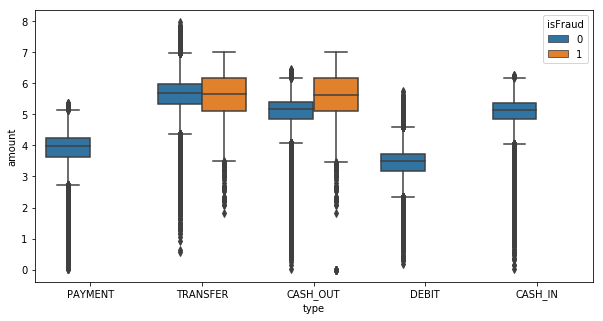

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y=np.log10(df['amount'] + 1), hue='isFraud', data=df);

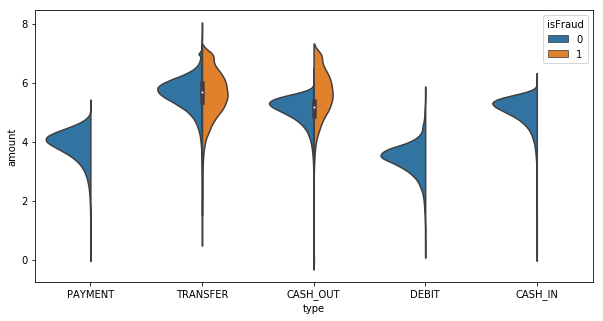

In [13]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='type', y=np.log10(df['amount'] + 1), data=df, hue='isFraud', split=True);

In [14]:
df['step'].value_counts().sort_index()

1      2708
2      1014
3       552
4       565
5       665
       ... 
739      10
740       6
741      22
742      14
743       8
Name: step, Length: 743, dtype: int64

This number matches the 31 * 24. So, it makes sense that the 'step' variable corresponds to an hour.

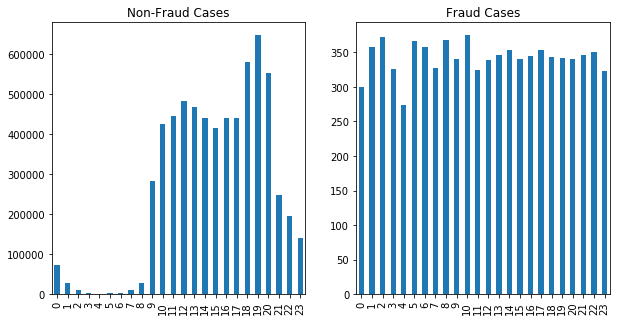

In [15]:
df['hour'] = df['step'].apply(lambda x: x % 24)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df['hour'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
df[df['isFraud']==1]['hour'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[0].set_title('Non-Fraud Cases')
ax[1].set_title('Fraud Cases');

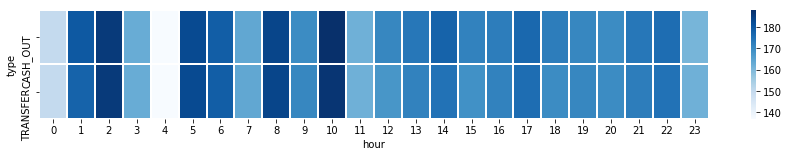

In [16]:
plt.figure(figsize=(15, 2))
fraud_channels = df[(df['type']=='CASH_OUT') | (df['type']=='TRANSFER')]
type_hour = fraud_channels.pivot_table(index='type', columns='hour', values='isFraud', aggfunc='sum')
sns.heatmap(type_hour, cmap='Blues', linewidth=1);
del fraud_channels
del type_hour

# Model and evaluation

From the data, we will use 70% for training and 30% for validation.
CatBoostClassifier (CatBoost) algorithm is used.
ROC-AUC is the metric choosen.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

Prepare the features (X) and labels (y).

In [21]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df.isFraud

Perform train-validation split.

In [22]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

Specify the categorical features. CatBoost is very efficient in treatment of categorical features - no special processing (Label encoding, One-Hot encoding, Binary encoding) needed.

In [23]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [24]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             od_wait=25)

In [25]:
clf.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8312827	best: 0.8312827 (0)	total: 13.5s	remaining: 1h 52m 30s
20:	test: 0.9942637	best: 0.9942637 (20)	total: 4m 48s	remaining: 1h 49m 50s
40:	test: 0.9968147	best: 0.9968209 (39)	total: 10m 16s	remaining: 1h 55m 2s
60:	test: 0.9977254	best: 0.9977254 (60)	total: 15m 45s	remaining: 1h 53m 22s
80:	test: 0.9978785	best: 0.9978785 (80)	total: 20m 55s	remaining: 1h 48m 13s
100:	test: 0.9978956	best: 0.9979050 (99)	total: 26m 17s	remaining: 1h 43m 53s
120:	test: 0.9980307	best: 0.9980433 (118)	total: 31m 35s	remaining: 1h 38m 58s
140:	test: 0.9980658	best: 0.9980710 (138)	total: 40m 34s	remaining: 1h 43m 18s
160:	test: 0.9981150	best: 0.9981150 (160)	total: 45m 45s	remaining: 1h 36m 20s
180:	test: 0.9981648	best: 0.9981757 (178)	total: 51m 22s	remaining: 1h 30m 33s
200:	test: 0.9982254	best: 0.9982298 (199)	total: 57m 7s	remaining: 1h 24m 58s
220:	test: 0.9982129	best: 0.9982437 (205)	total: 1h 2m 11s	remaining: 1h 18m 30s
Stopped by overfitting detector  (25 iterations wait)

b

Prediction for validation set.

In [26]:
preds = clf.predict(X_validation)

Confusion matrix.

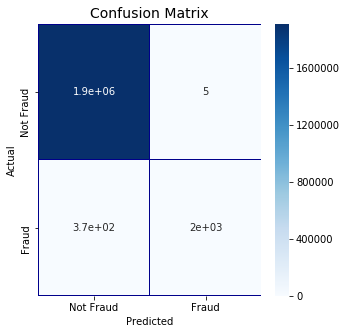

In [27]:
cm = pd.crosstab(y_validation.values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Validation ROC-AUC.

In [28]:
print(f"ROC-AUC score: {roc_auc_score(y_validation.values, preds)}")

ROC-AUC score: 0.9229638048917165
